In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import sys
sys.path.append("/home/z5297792/UNSW-MRes/MRes/modules") 
from utils import compute_tilt_data

df_eddies = pd.read_pickle('/srv/scratch/z5297792/Chapter2/SEACOFS_26yr_Eddy_Dataset/Eddy_Data/df_eddies_processed_1462_10650.pkl')

with open('/srv/scratch/z5297792/Chapter2/SEACOFS_26yr_Eddy_Dataset/Eddy_Data/Vertical_Eddy_Dataset/dic_vert_eddies_no_processing.pkl', 'rb') as f:
    dic_eddies_vert = pickle.load(f)

# dic_eddies_vert_processed = {}
# diffs = []
# for eddy, days_dict in dic_eddies_vert.items():
#     eddy_id = int(eddy[4:])  # "Eddy####" -> ####
#     df_eddy = df_eddies.loc[df_eddies.Eddy == eddy_id, ["Day", "xc", "yc"]]
#     day2xy = df_eddy.set_index("Day")[["xc", "yc"]]
#     kept = {}
#     for day, df in days_dict.items():
#         d = int(day[3:])  # "Day##" -> ##
#         if d not in day2xy.index or df.empty:
#             continue
#         xc, yc = day2xy.loc[d, ["xc", "yc"]].to_numpy()
#         x0, y0 = df.iloc[0][["x", "y"]].to_numpy()
#         if np.hypot(x0 - xc, y0 - yc) <= np.e**2:
#             kept[day] = df  # or days_dict[day] (same thing)
#         diffs.append(np.hypot(x0 - xc, y0 - yc))
#     dic_eddies_vert_processed[eddy] = kept

empty_df = pd.DataFrame(columns=['x', 'y', 'Q', 'w', 'Rc', 'psi0', 'A', 'R', 'z', 'Depth'])
dic_eddies_vert_processed = {}
diffs = []
for eddy, days_dict in dic_eddies_vert.items():
    eddy_id = int(eddy[4:])  # "Eddy####" -> ####
    df_eddy = df_eddies.loc[df_eddies.Eddy == eddy_id, ["Day", "xc", "yc"]]
    day2xy = df_eddy.drop_duplicates("Day").set_index("Day")[["xc", "yc"]]
    processed = {}
    for day, df in days_dict.items():
        d = int(day[3:])  # "Day##" -> ##
        if d not in day2xy.index or df.empty:
            processed[day] = empty_df.copy()
            continue
        xc, yc = day2xy.loc[d, ["xc", "yc"]].to_numpy()
        x0, y0 = df.iloc[0][["x", "y"]].to_numpy()
        dist = np.hypot(x0 - xc, y0 - yc)
        diffs.append(dist)
        if dist <= np.e**2:
            processed[day] = df
        else:
            processed[day] = empty_df.copy()
    dic_eddies_vert_processed[eddy] = processed

with open('/srv/scratch/z5297792/Chapter2/SEACOFS_26yr_Eddy_Dataset/Eddy_Data/Vertical_Eddy_Dataset/dic_vert_eddies.pkl', 'wb') as f:
    pickle.dump(dic_eddies_vert_processed, f)
    

Text(0, 0.5, 'Frequency')

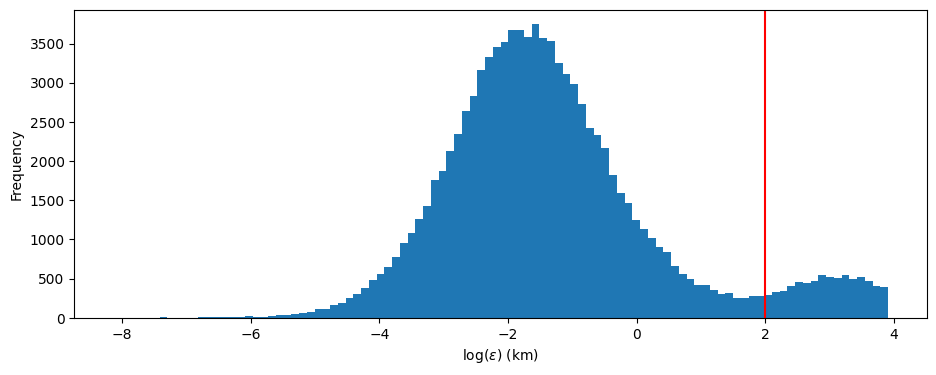

In [6]:
_, ax = plt.subplots(figsize=(11,4))
ax.hist(np.log(diffs), bins=100)
# ax.hist(diffs, bins=100, log=True)
ax.axvline(2, color='r')
ax.set_xlabel(r'$\log(\epsilon)$ (km)')
ax.set_ylabel('Frequency')


In [3]:
for e, eddy in enumerate(dic_eddies_vert_processed.keys()):
    dic = dic_eddies_vert_processed[eddy]
    df = compute_tilt_data(dic, int(eddy[4:]), num=6)
    if e == 0:
        df_tilt_data = df
    else:
        df_tilt_data = pd.concat([df_tilt_data, df], ignore_index=True)
df_tilt_data.to_pickle("/srv/scratch/z5297792/Chapter2/SEACOFS_26yr_Eddy_Dataset/Eddy_Data/Vertical_Eddy_Dataset/df_tilt_data.pkl") 
    
    